<a href="https://colab.research.google.com/github/akashgaurav1997/ML-Capstone-Project-of-Online-Customer-Segmentation/blob/main/Capstone_Project_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member -** Akashgaurav


# **Project Summary -**

Write the summary here within 500-600 words.
* This is a customer segmentation machine learning project on an online retail customer dataset.
* We have imported all the necessary libraries for this project.
* We have mounted the drive.
* We have loaded the dataset and converted it into a pandas dataframe.
* We have taken a glance at the dataframe.
* The dataframe contains 541,909 rows and 8 columns.
* We have handled all the missing values in the dataset and performed all the necessary exploratory data analysis (EDA).
* We have addressed all the outliers in the dataset.
* We have used the elbow method to determine the optimal value of k for k-means clustering.
* We have created clusters using k-means clustering.
* We have visualized the relationships between necessary clusters and columns using scatterplots.
* We have visualized the relevant insights using bar graphs.
* We have compiled a list of all the important observations and conclusions.

# **GitHub Link -**

Provide your GitHub Link here.


# **Problem Statement**


**Write Problem Statement Here.**
* We will try to identify groups of customers that are very important for the business.
* We will try to identify groups of customers that need necessary attention.
* We will try to identify products that are very profitable.
* We will try to identify years with the most revenue.
* We will try to identify the country with the most customers.
* We will try to find all necessary insights possible that are beneficial for the business.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_excel("/content/drive/MyDrive/weekyly_dayfolder/Online Retail.xlsx")

### Dataset First View

In [4]:
# Dataset First Look
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 541909
Number of columns: 8


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

5268

In [8]:
# Finding duplicade rows:
duplicates = df[df.duplicated(subset=['CustomerID'], keep=False)]

In [9]:
#Printing duplicate rows:
duplicates.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


*We have looked into the dataframe of duplicate rows, but it looks like its not a complete duplicate rows but duplicate customer id which cannot be handled by removing it as each transaction is important of each customer id. so we are not going to handle the duplicate value as it is not a duplicate complete row.*

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
missing_df = df.isna().sum()
missing_df

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

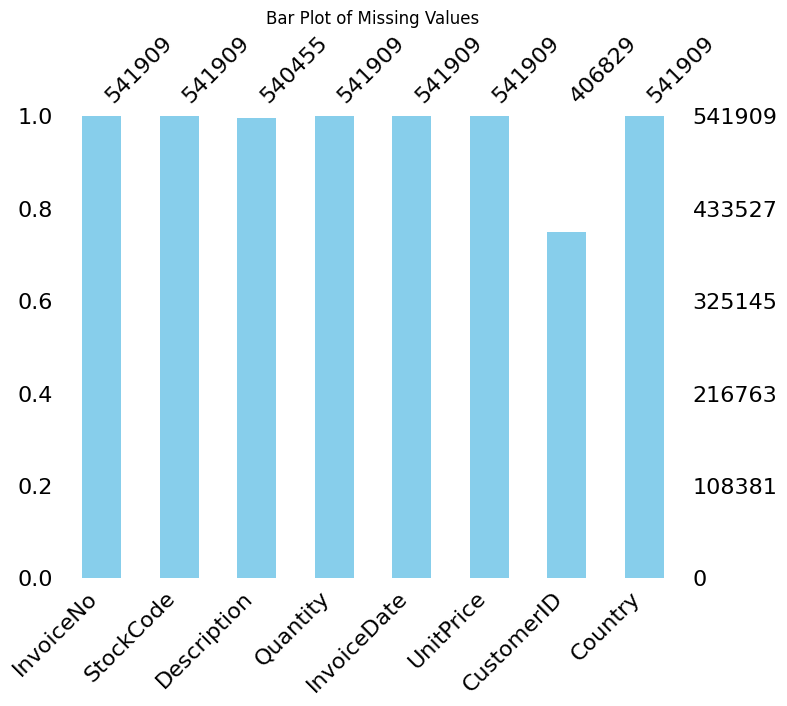

In [11]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, figsize=(8, 6), color='skyblue')
plt.title('Bar Plot of Missing Values')
plt.show()

### What did you know about your dataset?

Answer Here:
* This dataset has eight columns and 541,909 rows.
* There are no duplicate values in this dataset.
* The 'Customer ID' column contains missing values, as well as a few other columns.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

Answer Here
* InvoiceNo: The unique identifier for each customer order.
* StockCode: The unique code assigned to each purchased product in the stock inventory.
* Description: A description providing information about the product, such as its name, category, or features.
* Quantity: The number of units of a product purchased by the customer.
* InvoiceDate: The date when the purchase order was made.
* UnitPrice: The price of each unit of the product, usually in a specific currency (e.g., USD, GBP).
* CustomerID: The unique identifier assigned to each customer.
* Country: The country where the customer is located or registered.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
# Unique values of invoice no:
unique_invoice = df['InvoiceNo'].unique()

In [15]:
unique_invoice

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [16]:
# Unique values of Stockcode:
unique_stock = df['StockCode'].unique()

In [17]:
unique_stock

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

In [18]:
# Unique values of description:
unique_description = df['Description'].unique()

In [19]:
unique_description

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [20]:
# Unique values of Quantity:
unique_quantity = df['Quantity'].unique()

In [21]:
unique_quantity

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [22]:
# Unique values of invoicedate:
unique_date = df['InvoiceDate'].unique()

In [23]:
unique_date

array(['2010-12-01T08:26:00.000000000', '2010-12-01T08:28:00.000000000',
       '2010-12-01T08:34:00.000000000', ...,
       '2011-12-09T12:31:00.000000000', '2011-12-09T12:49:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

In [24]:
# Unique values of unitprice:
unique_unitprice = df['UnitPrice'].unique()

In [25]:
unique_unitprice

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

In [26]:
# Unique values of customerid:
unique_customerid = df['CustomerID'].unique()

In [27]:
unique_customerid

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [28]:
# Unique values of country:
unique_country = df['Country'].unique()

In [29]:
unique_country

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [30]:
# Shape of dataframe:
df.shape

(541909, 8)

In [31]:
# Removing rows where quantity and unitprice is 0:
df = df[(df['Quantity'] != 0) & (df['UnitPrice'] != 0)]

In [32]:
df.shape

(539394, 8)

In [33]:
#Handling missing values:
df = df.dropna(subset = ['Description'])
df = df.dropna(subset = ['CustomerID'])

In [34]:
df.shape

(406789, 8)

In [35]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [36]:
#Making a new column of TotalPrice:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

#Making a new column of Year:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

In [37]:
#Changing name of Description:
df.rename(columns={'Description': 'ProductName'}, inplace=True)

In [38]:
df.head(5)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


### What all manipulations have you done and insights you found?

Answer Here.
* We have removed rows where quantity and unit price were 0 as they were meaningless."
* We have dropped rows of description and customer ID where data was missing, as we cannot impute customer ID or product name manually.
* We created new columns named TotalPrice, Year, and Month for further analysis.
* We renamed the Description column to ProductName for a clearer understanding of the column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [39]:
#Printing customer counts in each country:
customer_counts = df['Country'].value_counts()
customer_counts

United Kingdom          361854
Germany                   9493
France                    8490
EIRE                      7483
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               1876
Portugal                  1480
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57
Lebanon                     45
Lithuani

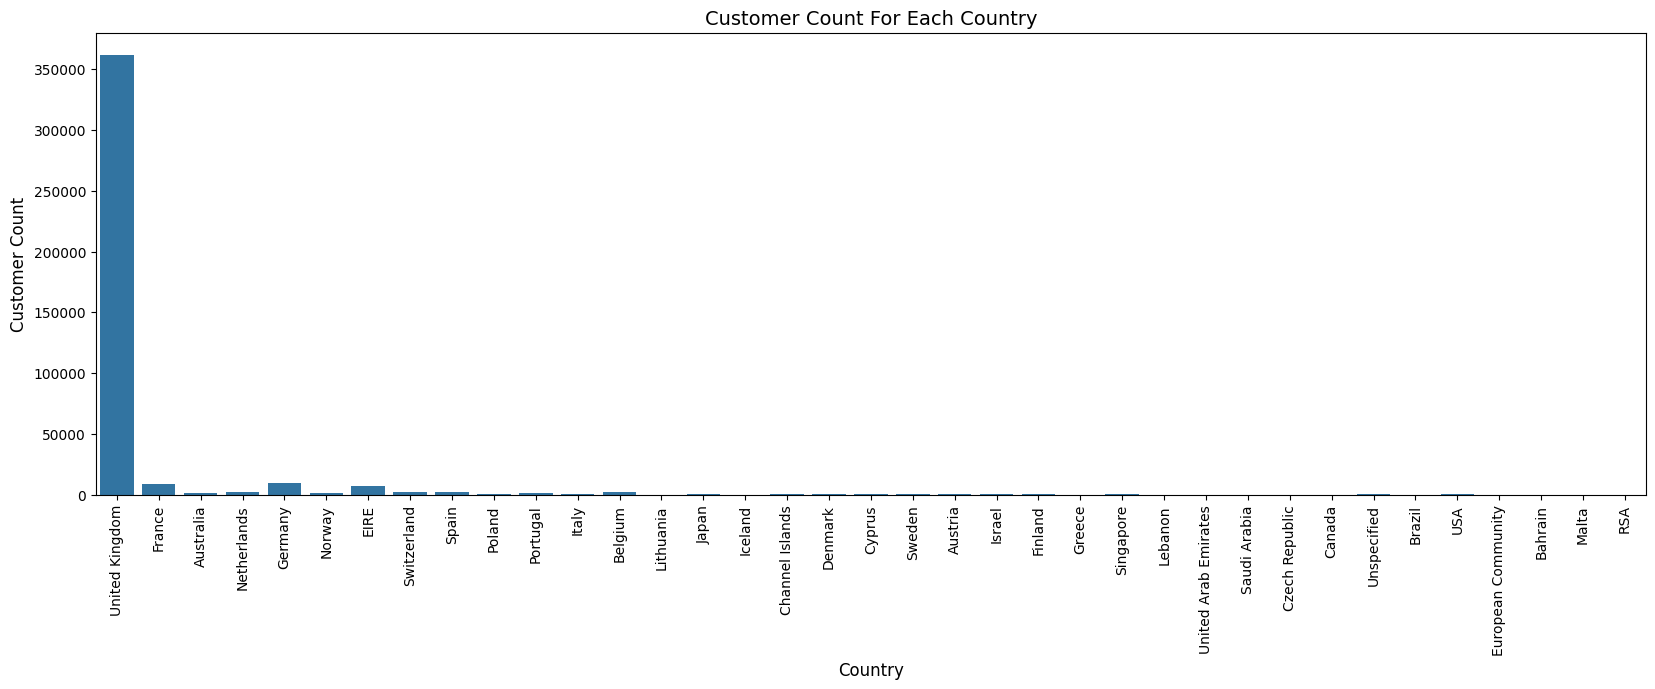

In [40]:
# Chart - 1 visualization code
# Making Visualization of cumtomer count for each country:
plt.figure(figsize = (20, 6))
sns.countplot(data = df, x = 'Country')
plt.title('Customer Count For Each Country', fontsize = 14)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Customer Count', fontsize = 12)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [41]:
# Total Sales From Each Country:
Total_Sales = df.groupby(['Country']).agg({'TotalPrice':'sum'}).sort_values('TotalPrice', ascending = False)
Total_Sales

,TotalPrice
Country,
United Kingdom,6767873.394
Netherlands,284661.540
EIRE,250285.220
Germany,221698.210
France,196712.840
Australia,137077.270
Switzerland,55739.400
Spain,54774.580
Belgium,40910.960


In [42]:
#Making top10 country dataset:
df2 = Total_Sales.head(10)

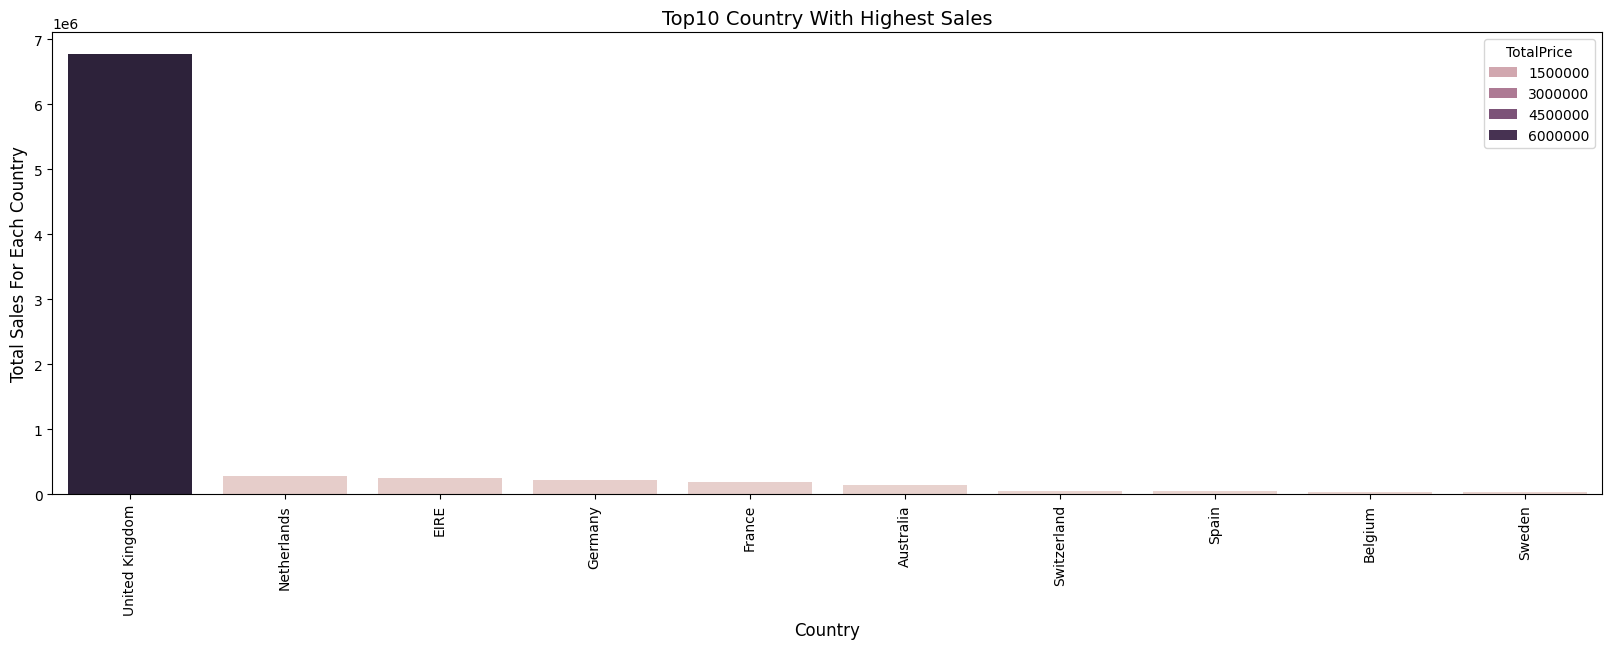

In [43]:
# Chart - 2 visualization code
#Visualizing top10 country with highest sales:
plt.figure(figsize = (20, 6))
sns.barplot(data = df2, x = 'Country', y = 'TotalPrice', hue = 'TotalPrice')
plt.title('Top10 Country With Highest Sales', fontsize = 14)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Total Sales For Each Country', fontsize = 12)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [44]:
# Aggregate sales data by grouping by country and stock code
sales_by_country_stock = df.groupby(['Country']).agg({'Quantity':'sum'}).sort_values('Quantity', ascending = False)
df8 = sales_by_country_stock.head(10)
df8

,Quantity
Country,
United Kingdom,3995801
Netherlands,199552
EIRE,136079
Germany,117446
France,109847
Australia,83345
Sweden,35637
Switzerland,29777
Spain,26813


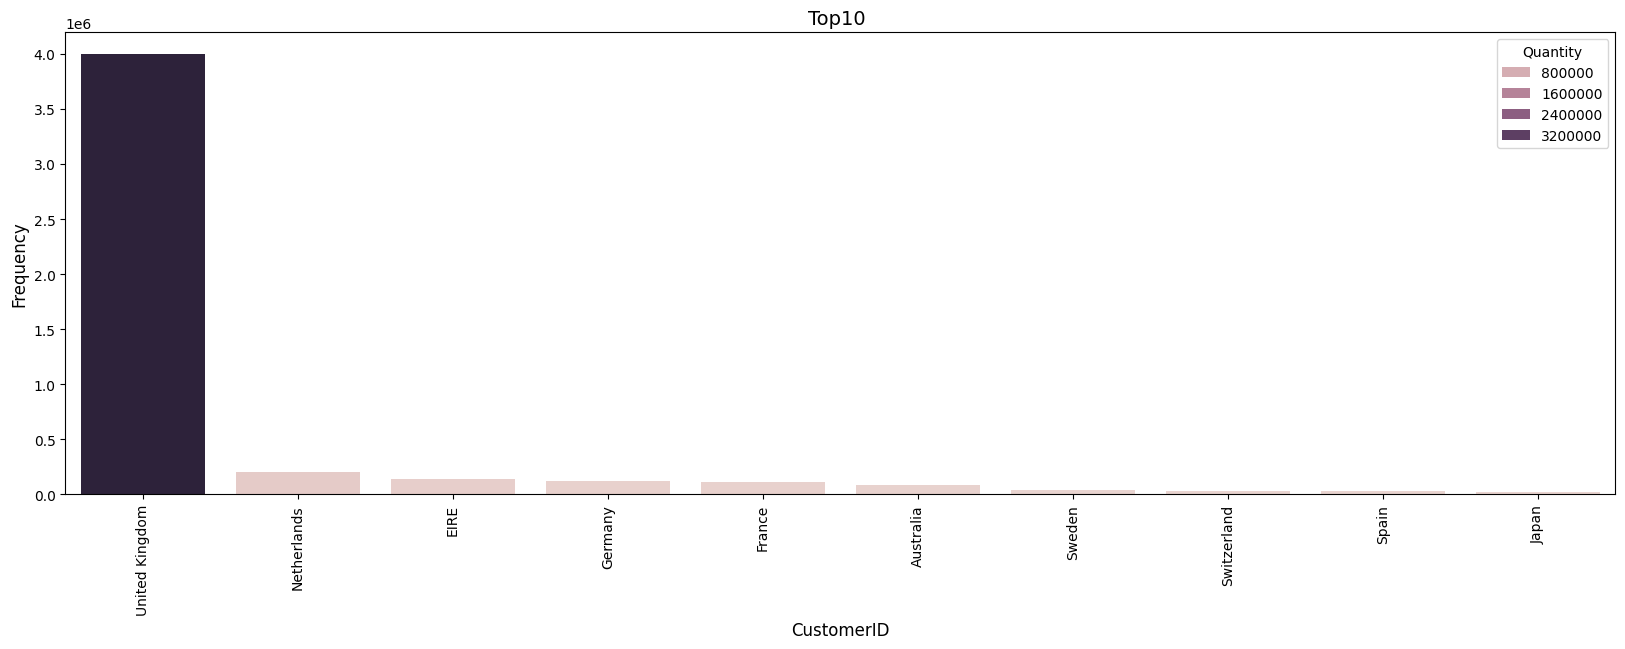

In [45]:
# visualizing top 10 country with quantity:
plt.figure(figsize = (20, 6))
sns.barplot(data = df8, x = 'Country', y = 'Quantity', hue = 'Quantity')
plt.title('Top10 ', fontsize = 14)
plt.xlabel('CustomerID', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [46]:
# Making a dataframe for each month total sales:
Month_Sales = df.groupby('Month').agg({'TotalPrice':'sum'})

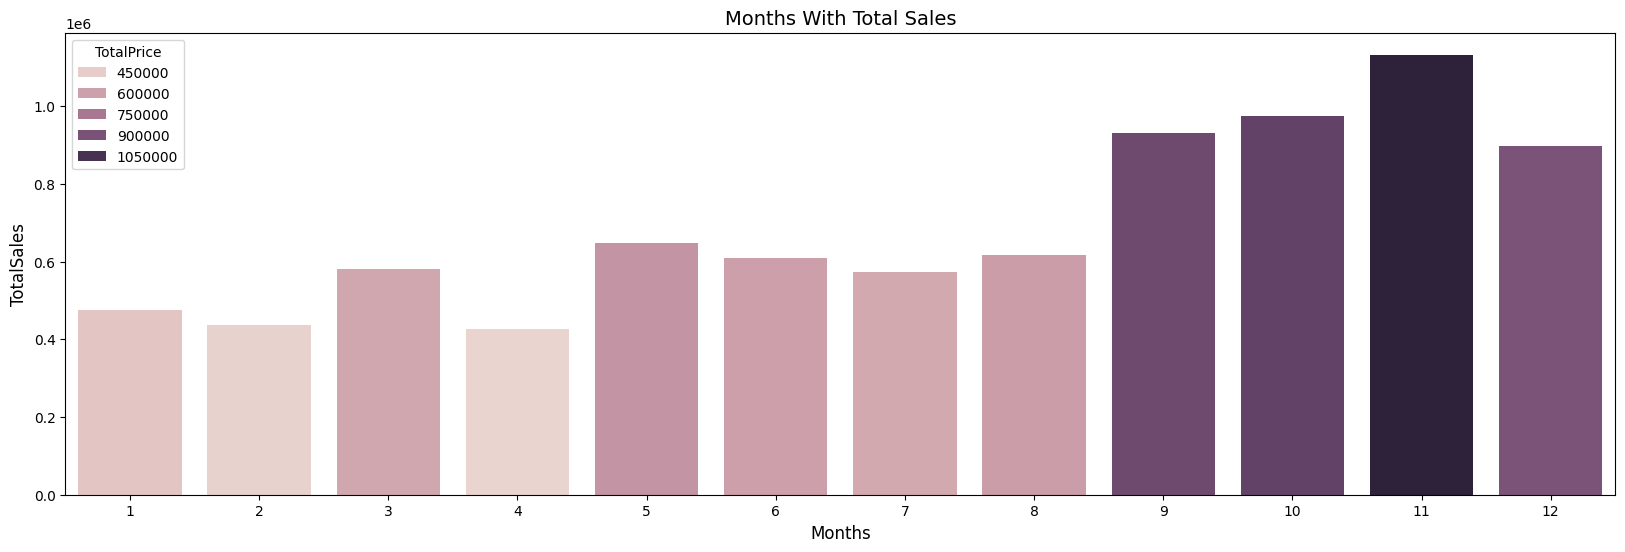

In [47]:
# Chart - 4 visualization code
# Visualizing months with its total sales:
plt.figure(figsize = (20, 6))
sns.barplot(data = Month_Sales, x = 'Month', y = 'TotalPrice', hue = 'TotalPrice')
plt.title('Months With Total Sales', fontsize = 14)
plt.xlabel('Months', fontsize = 12)
plt.ylabel('TotalSales', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [48]:
# Making a dataframe for stockcode with highest revenue:
Stock_Revenue = df.groupby(['StockCode', 'ProductName']).agg({ 'TotalPrice':'sum'}).sort_values('TotalPrice', ascending = False)
df5 = Stock_Revenue.head(10)
df5

,,TotalPrice
StockCode,ProductName,
22423,REGENCY CAKESTAND 3 TIER,132870.40
85123A,WHITE HANGING HEART T-LIGHT HOLDER,93823.85
85099B,JUMBO BAG RED RETROSPOT,83236.76
47566,PARTY BUNTING,67687.53
POST,POSTAGE,66710.24
84879,ASSORTED COLOUR BIRD ORNAMENT,56499.22
23084,RABBIT NIGHT LIGHT,51137.80
79321,CHILLI LIGHTS,45936.81
22086,PAPER CHAIN KIT 50'S CHRISTMAS,41500.48


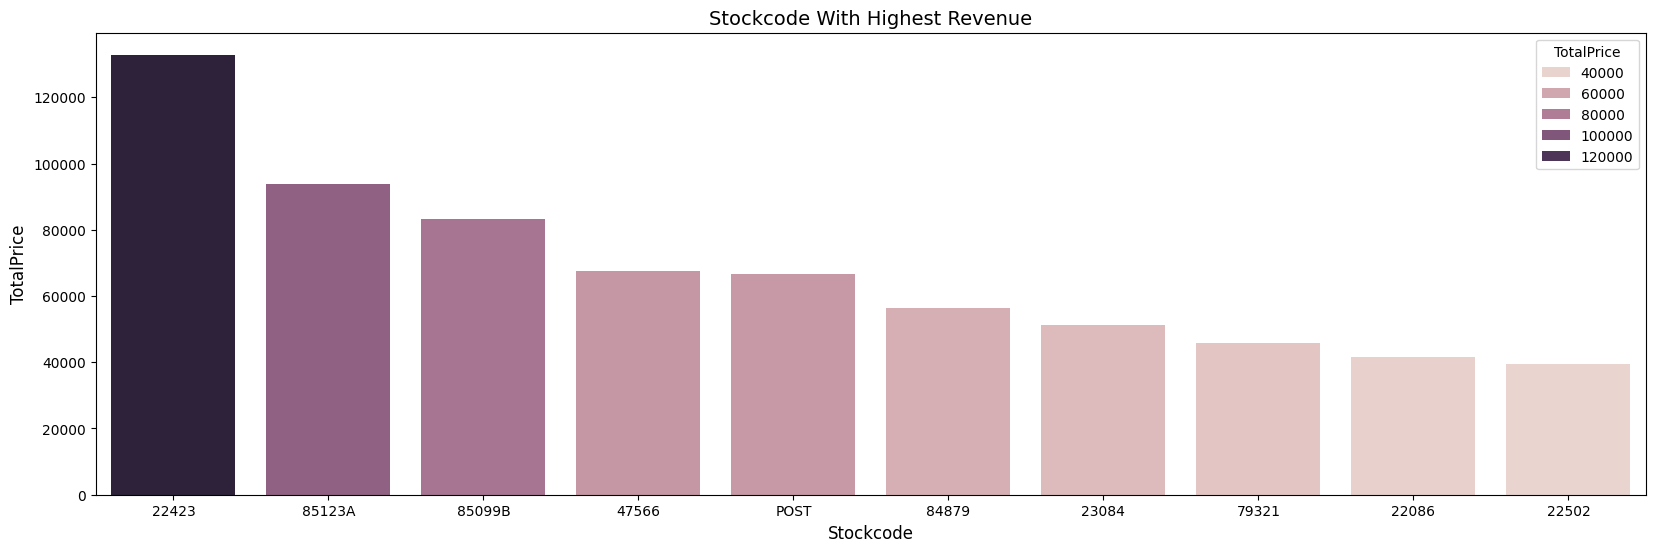

In [49]:
# Chart - 5 visualization code
# Visualizing stockcode with highest revenue:
plt.figure(figsize = (20, 6))
sns.barplot(data = df5, x = 'StockCode', y = 'TotalPrice', hue = 'TotalPrice')
plt.title('Stockcode With Highest Revenue', fontsize = 14)
plt.xlabel('Stockcode', fontsize = 12)
plt.ylabel('TotalPrice', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [50]:
# Making a dataframe for stockcode with highest quantity:
Stock_Revenue = df.groupby(['StockCode', 'ProductName']).agg({ 'Quantity':'sum'}).sort_values('Quantity', ascending = False)
df6 = Stock_Revenue.head(10)
df6

,,Quantity
StockCode,ProductName,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
85099B,JUMBO BAG RED RETROSPOT,45066
84879,ASSORTED COLOUR BIRD ORNAMENT,35314
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147
21212,PACK OF 72 RETROSPOT CAKE CASES,33409
22197,POPCORN HOLDER,30504
23084,RABBIT NIGHT LIGHT,27094
22492,MINI PAINT SET VINTAGE,25880
22616,PACK OF 12 LONDON TISSUES,25321


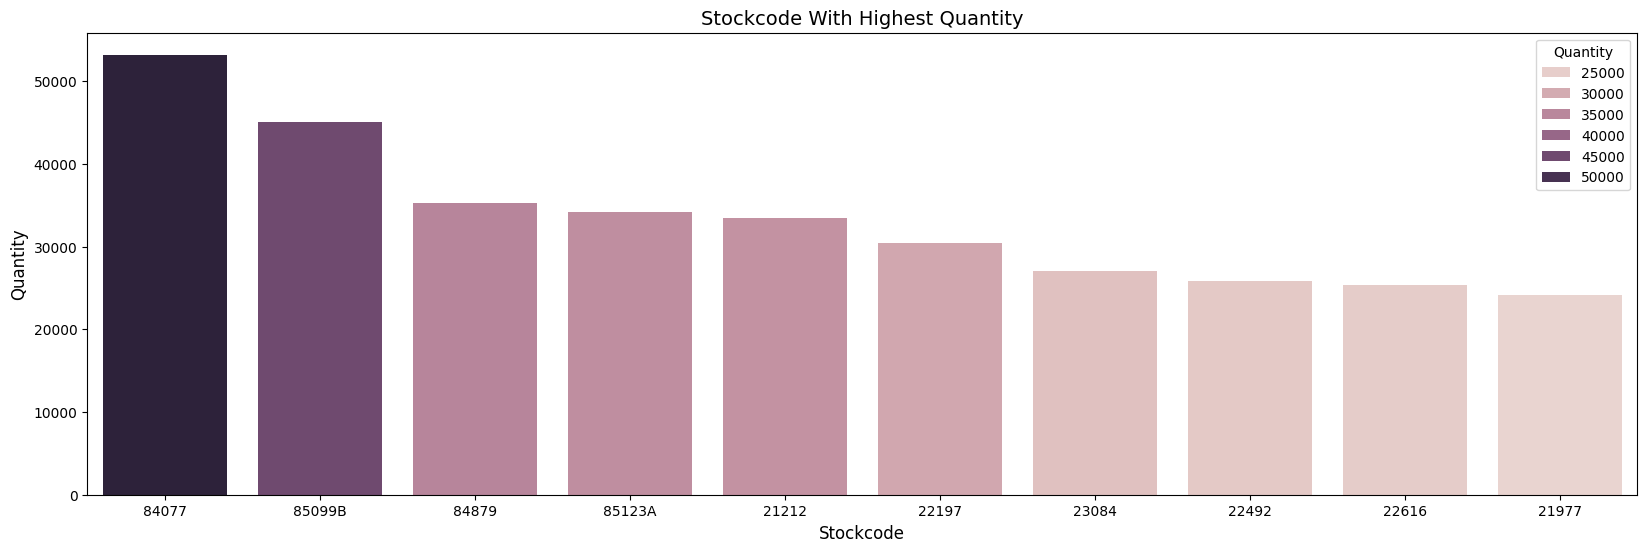

In [51]:
# Chart - 6 visualization code
# Visualizing stockcode with highest quantity:
plt.figure(figsize = (20, 6))
sns.barplot(data = df6, x = 'StockCode', y = 'Quantity', hue = 'Quantity')
plt.title('Stockcode With Highest Quantity', fontsize = 14)
plt.xlabel('Stockcode', fontsize = 12)
plt.ylabel('Quantity', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [52]:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [53]:
#Making a dataframe for each year total sales:
Year_Sales = df.groupby('Year').agg({'TotalPrice':'sum'})

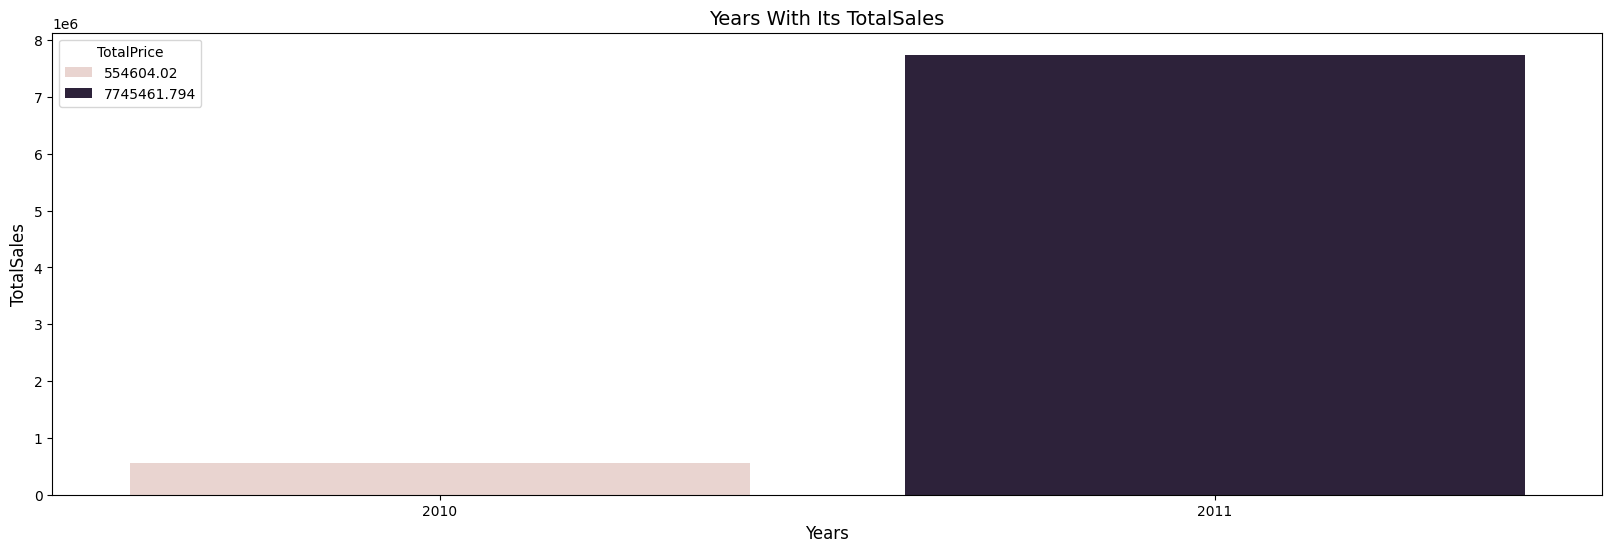

In [54]:
# Chart - 7 visualization code
#Visualizing years with its sales:
plt.figure(figsize = (20, 6))
sns.barplot(data = Year_Sales, x = 'Year', y = 'TotalPrice', hue = 'TotalPrice')
plt.title('Years With Its TotalSales', fontsize = 14)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('TotalSales', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [55]:
#Making a dataframe for top10 most regular customer:
Regular_Customer = df['CustomerID'].value_counts().reset_index()
Regular_Customer.columns = ['CustomerID', 'Frequency']

df8 = Regular_Customer.head(10)
df8

,CustomerID,Frequency
0,17841.0,7983
1,14911.0,5901
2,14096.0,5128
3,12748.0,4641
4,14606.0,2782
5,15311.0,2491
6,14646.0,2081
7,13089.0,1857
8,13263.0,1677
9,14298.0,1640


#### Chart - 9

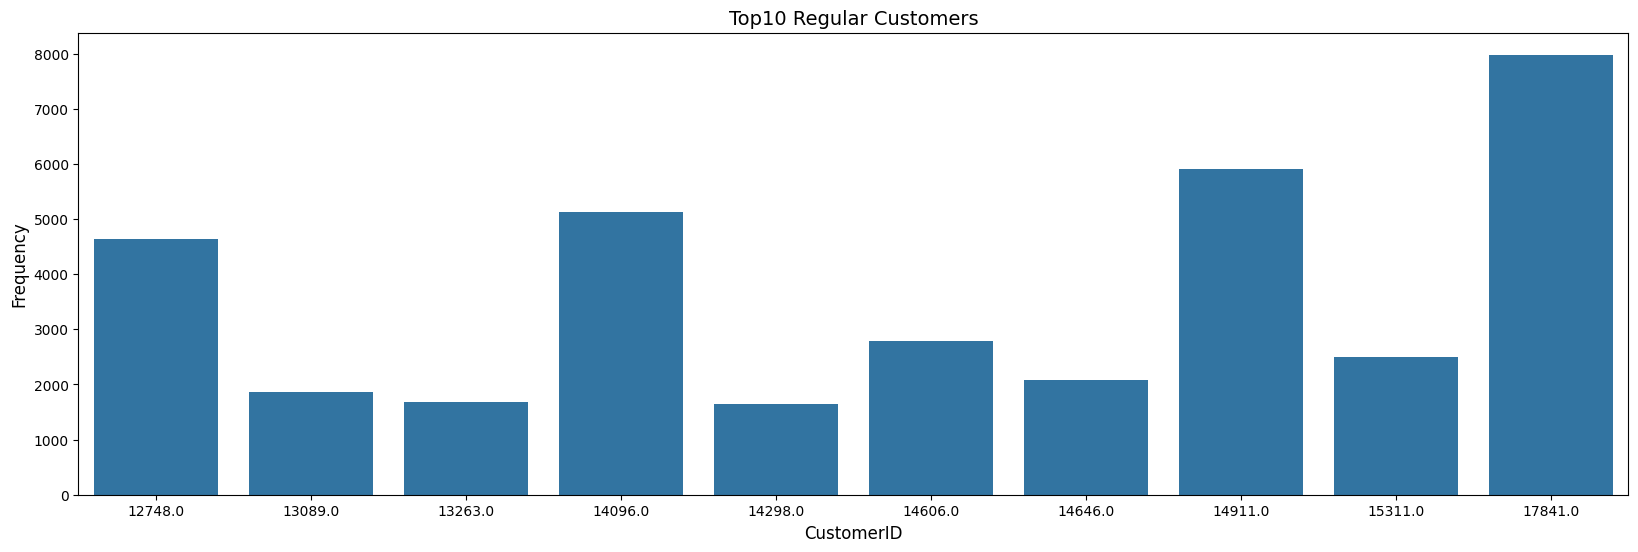

In [56]:
# Visualizing top10 regular customer:
plt.figure(figsize = (20, 6))
sns.barplot(data = df8, x = 'CustomerID', y = 'Frequency')
plt.title('Top10 Regular Customers', fontsize = 14)
plt.xlabel('CustomerID', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [57]:
# Making a dataframe for customerid with highest purchase amount:
customer_revenue = df.groupby(['CustomerID']).agg({ 'TotalPrice':'sum'}).sort_values('TotalPrice', ascending = False)
df10 = customer_revenue.head(10)
df10

,TotalPrice
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45
14156.0,113384.14
17511.0,88125.38
16684.0,65892.08
13694.0,62653.10


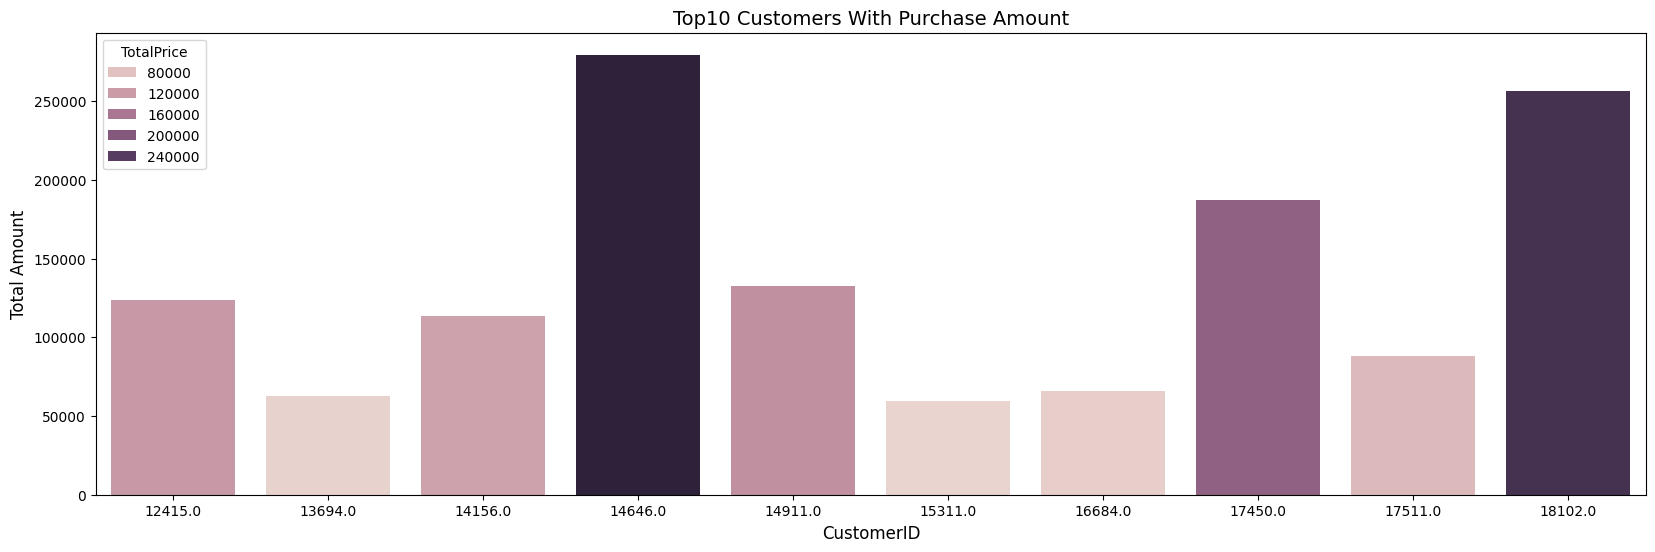

In [58]:
# Chart - 10 visualization code
# Visualizing top 10 customers with total purchase amount:
plt.figure(figsize = (20, 6))
sns.barplot(data = df10, x = 'CustomerID', y = 'TotalPrice', hue = 'TotalPrice')
plt.title('Top10 Customers With Purchase Amount', fontsize = 14)
plt.xlabel('CustomerID', fontsize = 12)
plt.ylabel('Total Amount', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [59]:
# Making a dataframe for stockcode with highest quantity:
customer_quantity = df.groupby(['CustomerID']).agg({ 'Quantity':'sum'}).sort_values('Quantity', ascending = False)
df11 = customer_quantity.head(10)
df11

,Quantity
CustomerID,
14646.0,196143
12415.0,76946
14911.0,76930
17450.0,69029
18102.0,64122
17511.0,63012
13694.0,61803
14298.0,58021
14156.0,57025


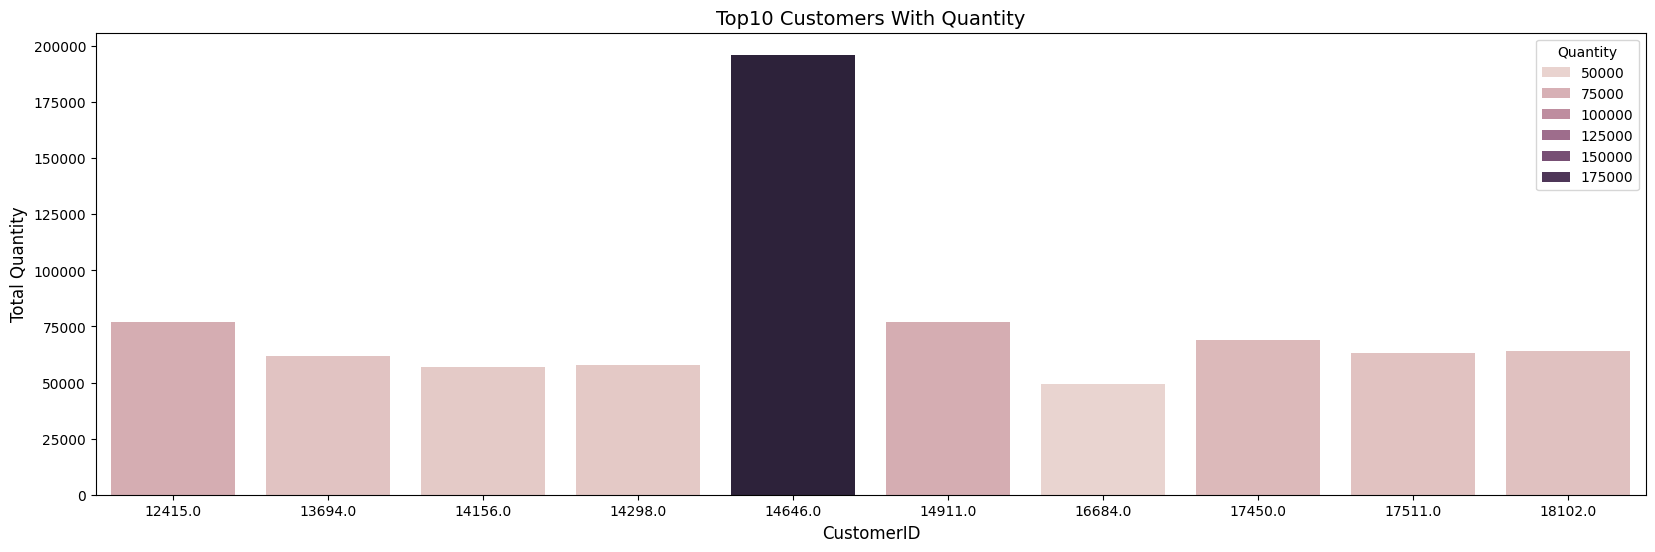

In [60]:
# Chart - 11 visualization code
# Visualizing top 10 customers with highest quantity:
plt.figure(figsize = (20, 6))
sns.barplot(data = df11, x = 'CustomerID', y = 'Quantity', hue = 'Quantity')
plt.title('Top10 Customers With Quantity', fontsize = 14)
plt.xlabel('CustomerID', fontsize = 12)
plt.ylabel('Total Quantity', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [61]:
df.head(5)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [62]:
# Group the DataFrame by 'Country' and count the occurrences of each country
country_counts = df['Country'].value_counts()

In [63]:
# Get the top 10 countries
top_10_countries = country_counts.head(10)
top_10_countries

United Kingdom    361854
Germany             9493
France              8490
EIRE                7483
Spain               2532
Netherlands         2367
Belgium             2069
Switzerland         1876
Portugal            1480
Australia           1256
Name: Country, dtype: int64

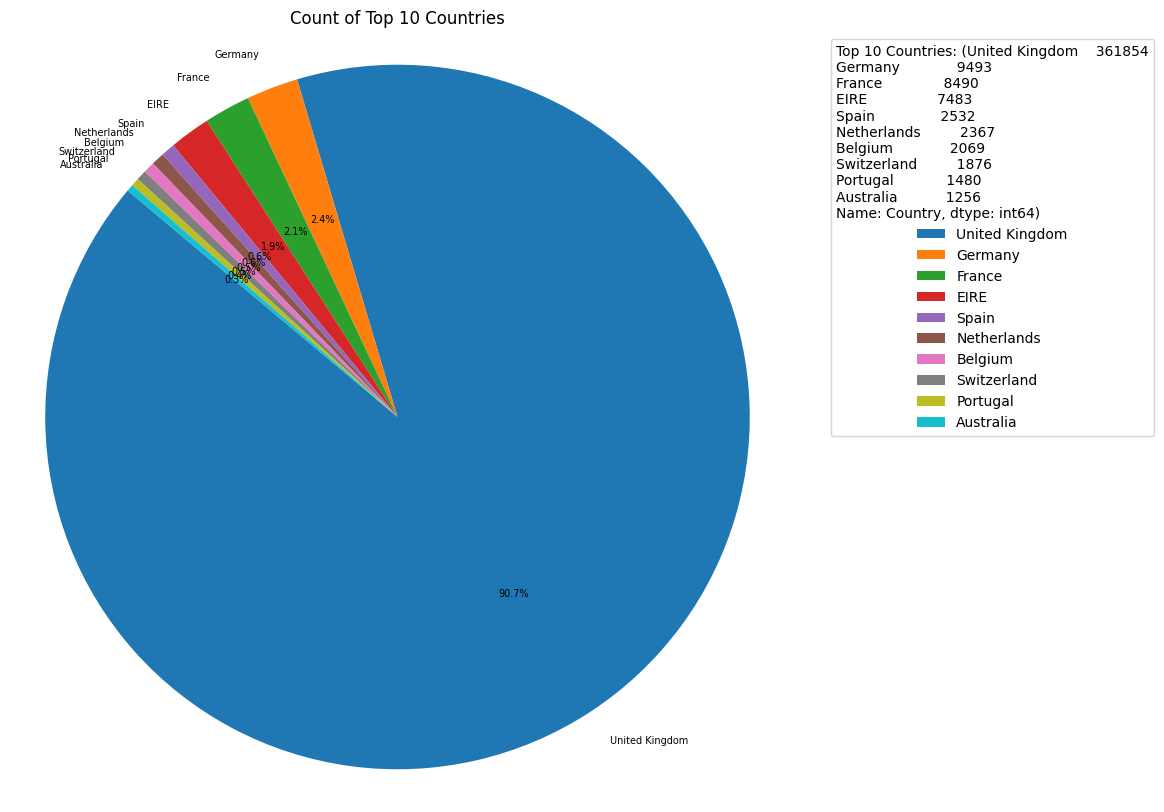

In [64]:
# Chart - 12 visualization code
# Visualizing top10 country with counts on pie charts:


# Ploting a pie chart to show the count of each country:
plt.figure(figsize=(10, 10))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 7})
plt.title('Count of Top 10 Countries')
plt.axis('equal')

# Creating legend for remaining countries:
plt.legend(title='Top 10 Countries: ({})'.format(top_10_countries), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [65]:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [66]:
# Group the DataFrame by 'Productname' and count:
product_counts = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)


In [110]:
# Get the top 10 productname:
top_10_products = product_counts.head(10)

top_10_products

ProductName
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64

In [112]:
df['Quantity'].sum()

4893004

In [111]:
top_10_products.sum()

334113

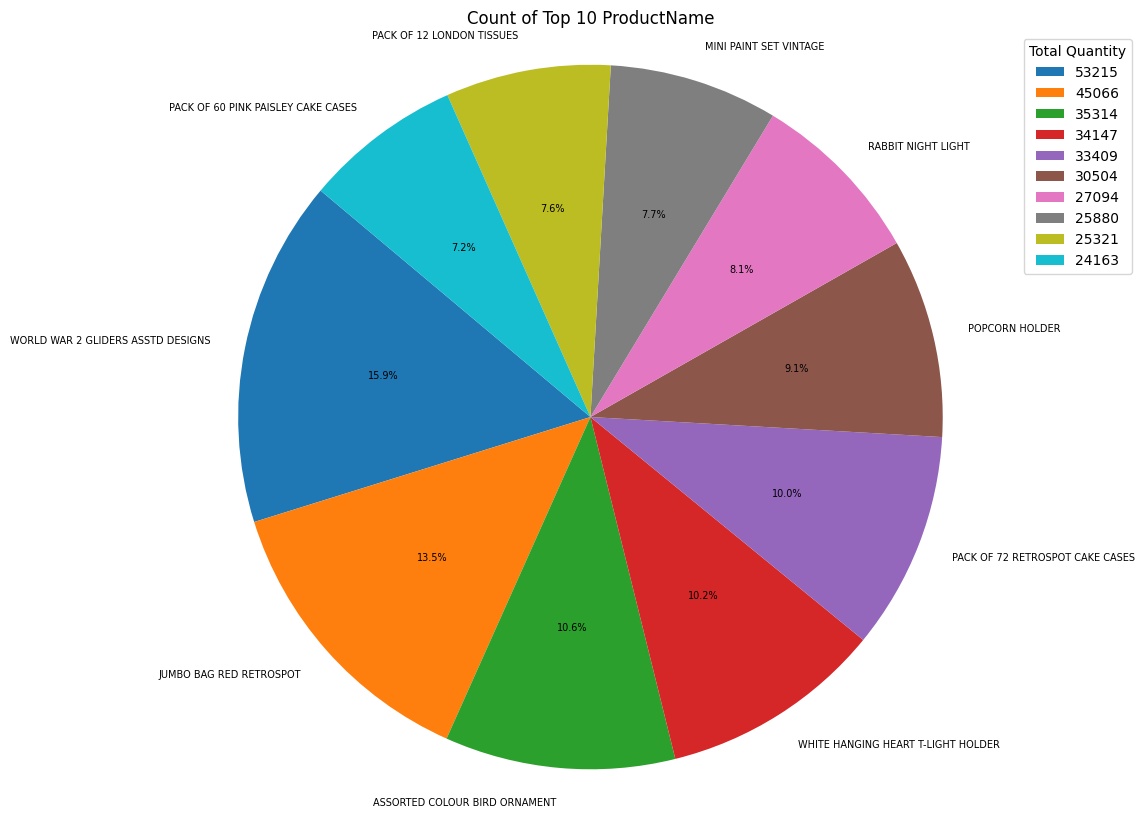

In [105]:
# Chart - 13 visualization code

# Ploting a pie chart to show the count of top 10 products:
plt.figure(figsize=(10, 10))
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 7})
plt.title('Count of Top 10 ProductName')
plt.axis('equal')

# Creating legend for remaining countries:
plt.legend(title = 'Total Quantity', labels = top_10_products, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

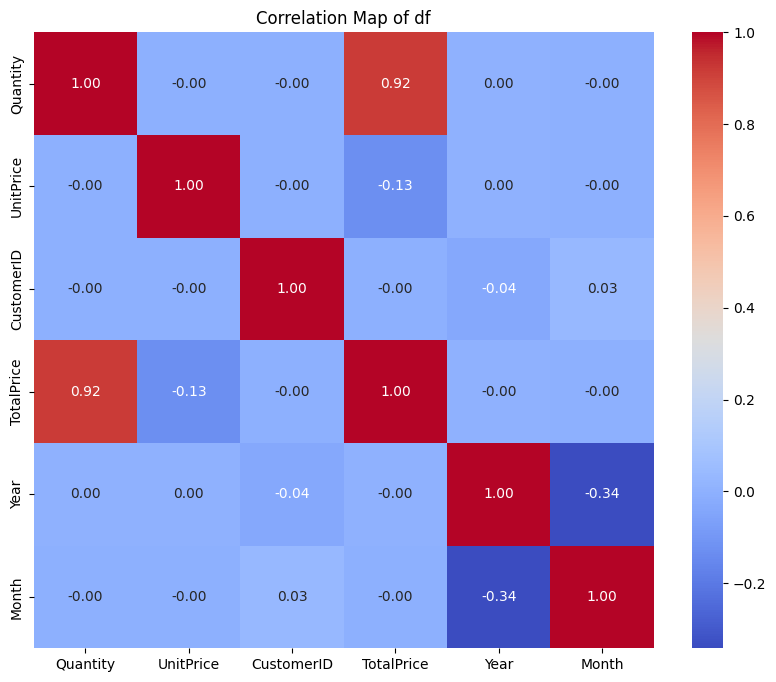

In [69]:
# Correlation Heatmap visualization code:

# Computing the correlation matrix:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Map of df')

# Show the plot:
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
* Correlation maps are useful for visualizing relationships between different variables, providing a clear understanding of their interrelationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* We identified a strong relationship between the 'Quantity' and 'TotalPrice' columns.

#### Chart - 15 - Pair Plot

##### 1. Why did you pick the specific chart?

Answer Here.
* Pair Plot is useful for identifying overall patterns and trends in the dataframe. It is also helpful in detecting outliers and understanding the overall relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.
####Three Hypothetical Statement:
1. There is relation between quantity and totalprice.
2. UK is giving more than 70 % revenue.
3. Sales are higher in winter season.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
* Null Hyposthesis :- There is no relation between quantity and totalprice.
* Alternate Hypothesis :- There is relation between quantity and totalprice.

#### 2. Perform an appropriate statistical test.

In [113]:
# Perform Statistical Test to obtain P-Value:
from scipy.stats import pearsonr

# Assuming 'df' is your DataFrame containing the relevant columns 'Quantity' and 'TotalPrice'
quantity = df['Quantity']
total_price = df['TotalPrice']

# Perform the Pearson correlation test
correlation_coefficient, p_value = pearsonr(quantity, total_price)

# Set the significance level
alpha = 0.05

# Print the results
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between quantity and total price.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between quantity and total price.")


Pearson correlation coefficient: 0.9189762864035358
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between quantity and total price.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
*
The statistical test conducted to obtain the p-value is the Pearson correlation test.

##### Why did you choose the specific statistical test?

Answer Here.
* The Pearson correlation test was chosen because it assesses the linear relationship between two continuous variables, which aligns with the hypothesis of investigating the relationship between quantity and total price.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
* Null Hypothesis :- UK is giving equal revenue.
* Alternate Hypothesis :- UK is giving 70 % revenue.

#### 2. Perform an appropriate statistical test.

In [121]:
df_totalprice = int(df['TotalPrice'].sum())
df_totalprice

8300065

In [127]:
uk_totalrevenue = int(df[df['Country'] == 'United Kingdom']['TotalPrice'].sum())
uk_totalrevenue

6767873

In [128]:
# Perform Statistical Test to obtain P-Value:
import pandas as pd
from scipy.stats import binomtest

# Assuming 'df' is your DataFrame containing the relevant columns

# Calculate total revenue
total_revenue = df_totalprice

# Calculate total revenue from the UK
uk_revenue = uk_totalrevenue

# Calculate the percentage of revenue from the UK
uk_percentage = (uk_revenue / total_revenue) * 100

# Set the expected percentage
expected_percentage = 70

# Perform a binomial test to compare the observed percentage to the expected percentage
p_value = binomtest(uk_revenue, total_revenue, expected_percentage/100, alternative='greater').pvalue

# Print the results
print("Total revenue from the UK:", uk_revenue)
print("Percentage of revenue from the UK:", uk_percentage)
print("Expected percentage of revenue from the UK:", expected_percentage)
print("p-value:", p_value)

# Check the hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis. The UK revenue is significantly greater than 70% of total revenue.")
else:
    print("Fail to reject the null hypothesis. The UK revenue is not significantly greater than 70% of total revenue.")


Total revenue from the UK: 6767873
Percentage of revenue from the UK: 81.5399999879519
Expected percentage of revenue from the UK: 70
p-value: 0.0
Reject the null hypothesis. The UK revenue is significantly greater than 70% of total revenue.


##### Which statistical test have you done to obtain P-Value?

Answer Here:
* I have used binomial test to obtain P-Value.

##### Why did you choose the specific statistical test?

Answer Here.
*
The binomial test was chosen because it is appropriate for comparing a single proportion (the proportion of revenue from the United Kinkdom) to a hypothesized value (70% of total revenue) when the data consists of binary outcomes (revenue from the United Kingdom vs. revenue from other countries).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In [129]:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


Answer Here.
* Null Hypothesis :- Sales are equal in every season.
* Alternate  Hypothesis :- Sales are higher in winter season.

#### 2. Perform an appropriate statistical test.

In [161]:
import pandas as pd
from scipy.stats import ttest_ind


# Calculating the average total sales for the winter season:
winter_sales_mean = df[df['Month'].isin([9, 10, 11, 12])]['TotalPrice'].mean()

# Calculating the average total sales for the rest of the year:
other_season_sales_mean = df[~df['Month'].isin([9, 10, 11, 12])]['TotalPrice'].mean()

# Performing a t-test to compare the average sales in winter season to the rest of the year:
t_statistic, p_value = ttest_ind(df[df['Month'].isin([9, 10, 11, 12])]['TotalPrice'],
                                  df[~df['Month'].isin([9, 10, 11, 12])]['TotalPrice'],
                                  alternative='greater')

# Setting the significance level:
alpha = 0.05

# Printing the results:
print("p-value:", p_value)

# Checking the hypothesis:
if p_value < alpha:
    print("Reject the null hypothesis. Sales are significantly higher in the winter season.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sales between winter season and the rest of the year.")


p-value: 0.9040375810028778
Fail to reject the null hypothesis. There is no significant difference in sales between winter season and the rest of the year.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
* The statistical test used to obtain the p-value is the one-sample t-test.







##### Why did you choose the specific statistical test?

Answer Here.
*
The specific statistical test, the one-sample t-test, was chosen because it is appropriate for comparing the mean of a single sample (in this case, the average winter sales) against a known or hypothesized population mean (the given winter sales average). This test allows us to determine whether there is a significant difference between the observed average and the hypothesized average

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [162]:
# Handling Missing Values & Missing Value Imputation:
df.isna().sum()

InvoiceNo      0
StockCode      0
ProductName    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
Year           0
Month          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [163]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice,Year,Month
count,406789.000000,406789.000000,406789.000000,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830,20.403860,2010.934003,7.605887
std,247.927842,69.318561,1713.573064,427.612692,0.248278,3.418936
min,-80995.000000,0.001000,12346.000000,-168469.600000,2010.000000,1.000000
25%,2.000000,1.250000,13954.000000,4.200000,2011.000000,5.000000
50%,5.000000,1.950000,15152.000000,11.100000,2011.000000,8.000000
75%,12.000000,3.750000,16791.000000,19.500000,2011.000000,11.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,2011.000000,12.000000


In [165]:
# Handling Outliers & Outlier treatments:
import pandas as pd
from scipy.stats.mstats import winsorize

# Filtering numeric columns:
numeric_columns = df.select_dtypes(include=['number']).columns

# Winsorize numeric columns of the DataFrame:
df[numeric_columns] = df[numeric_columns].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))


In [166]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice,Year,Month
count,406789.000000,406789.000000,406789.000000,406789.000000,406789.000000,406789.000000
mean,8.695783,2.697590,15285.136766,15.615272,2010.934003,7.605887
std,9.488715,2.290856,1686.441897,16.218066,0.248278,3.418936
min,1.000000,0.420000,12626.000000,0.850000,2010.000000,1.000000
25%,2.000000,1.250000,13954.000000,4.200000,2011.000000,5.000000
50%,5.000000,1.950000,15152.000000,11.100000,2011.000000,8.000000
75%,12.000000,3.750000,16791.000000,19.500000,2011.000000,11.000000
max,36.000000,8.500000,17905.000000,67.200000,2011.000000,12.000000


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

I used winsorization as the outlier treatment technique. Winsorization is chosen for its simplicity and effectiveness in handling outliers in data.

Here's why winsorization was used:

Winsorization:
* Winsorization is a robust method that replaces extreme values (outliers) with less extreme values, typically the values at a specified percentile of the data distribution.
* It preserves the original distribution of the data, making it suitable for datasets with non-normal distributions.
* Winsorization is less sensitive to outliers compared to other techniques like trimming or removing outliers, which might lead to loss of information or distortion of the data distribution.

### 3. Categorical Encoding

In [75]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [76]:
# Expand Contraction

In [167]:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


#### 2. Lower Casing

In [168]:
# Lower Casing
# Lower Casing using inbuilt lower():
def lower_casing(text):
  ''' function takes string and convert it to lower case '''
  list_of_words = [letter.lower() for letter in text.split()]
  return " ".join(list_of_words)

df['ProductName'] = df['ProductName'].apply(lower_casing)

#### 3. Removing Punctuations

In [169]:
# Remove Punctuations
# Importing required library for removing punctuations from a string:
import string

# Removing Punctuations:
def remove_punctuation(text):
    ''' function takes a string and remove punctuation from it '''
    return ''.join([t for t in text if t not in string.punctuation])


df['ProductName'] = df['ProductName'].apply(remove_punctuation)

In [170]:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


#### 4. Removing URLs & Removing words and digits contain digits.

In [79]:
# Remove URLs & Remove words and digits contain digits:
# Removing  digits:
def remove_digits(text):
  ''' function takes a string and remove any digits from it '''
  num = '1,2,3,4,5,6,7,8,9,0'
  return ''.join([s for s in text if s not in num])

df['ProductName'] = df['ProductName'].apply(remove_digits)


# Removing URLs:
def remove_url(text):
  ''' funtiong takes a string and remove any urls from it '''
  return ''.join([s for s in text if s not in ['com', 'www', 'https//']])


df['ProductName'] = df['ProductName'].apply(remove_url)

#### 5. Removing Stopwords & Removing White spaces

In [171]:
!pip install nltk


In [172]:
#importing necessary library:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [173]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  ''' funtion taking a string and removing stopwords '''

  return ' '.join([word for word in text.split() if word.lower() not in stop_words])


df['ProductName'] = df['ProductName'].apply(remove_stopwords)

In [175]:
# Remove White spaces
def remove_whitespace(text):
  ''' function takes a string and remove white space from it '''
  return ' '.join([word.strip() for word in text.split()])

df['ProductName'] = df['ProductName'].apply(remove_whitespace)

In [176]:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


#### 6. Rephrase Text

In [82]:
# Rephrase Text

#### 7. Tokenization

In [177]:
# Tokenization
#Importing necessary library for tokenization:
from sklearn.feature_extraction.text import CountVectorizer

#Defining a word token function:
def word_token(text, count_vectorizer):
    ''' function takes a dataset and convert it to tokens '''
    count_vectorizer.fit_transform(text)
    return count_vectorizer.vocabulary_.items()

# Initializing CountVectorizer outside the function:
count_vectorizer = CountVectorizer()

# Calling the function with the CountVectorizer object as a parameter:
dictionary_cluster_col = word_token(df['ProductName'], count_vectorizer)
print(dictionary_cluster_col)

dict_items([('white', 2069), ('hanging', 908), ('heart', 918), ('tlight', 1950), ('holder', 944), ('metal', 1182), ('lantern', 1060), ('cream', 514), ('cupid', 537), ('hearts', 920), ('coat', 453), ('hanger', 906), ('knitted', 1044), ('union', 2021), ('flag', 734), ('hot', 958), ('water', 2059), ('bottle', 236), ('red', 1559), ('woolly', 2094), ('hottie', 959), ('set', 1681), ('babushka', 108), ('nesting', 1275), ('boxes', 248), ('glass', 847), ('star', 1826), ('frosted', 797), ('hand', 903), ('warmer', 2052), ('jack', 993), ('polka', 1466), ('dot', 623), ('assorted', 105), ('colour', 463), ('bird', 187), ('ornament', 1325), ('poppys', 1482), ('playhouse', 1456), ('bedroom', 165), ('kitchen', 1037), ('feltcraft', 718), ('princess', 1507), ('charlotte', 383), ('doll', 609), ('ivory', 990), ('mug', 1240), ('cosy', 494), ('box', 245), ('teaspoons', 1924), ('vintage', 2041), ('jigsaw', 1012), ('blocks', 207), ('alphabet', 73), ('home', 949), ('building', 274), ('block', 206), ('word', 2095

#### 8. Text Normalization

In [178]:
#Downloding necessary library:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [179]:
# Importing necessary library:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [180]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Text normalization using lemmatization:
def lemmatize_text(text):
    ''' function takes a string and performs lemmatization '''
    # Tokenizing text
    tokens = word_tokenize(text)

    # Initializing WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatizing tokens:
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Joining lemmatized tokens back into a string:
    lemmatized_text = ' '.join(lemmatized_tokens)

    return lemmatized_text

# Applying lemmatization to the 'Review' column:
df['ProductName'] = df['ProductName'].apply(lemmatize_text)

In [181]:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


##### Which text normalization technique have you used and why?

Answer Here.
*  I used lemmatization as the text normalization technique. Lemmatization was chosen for its ability to reduce words to their base or dictionary form, which helps in standardizing and reducing the dimensionality of the text data.

#### 9. Part of speech tagging

In [85]:
# POS Taging

#### 10. Text Vectorization

In [183]:
# Vectorizing Text
#Importing necessary library for text vectorization:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorization(data_column, min_df_prop, max_df_prop):
    # Initializing TF-IDF vectorizer:
    tfidf_vectorizer = TfidfVectorizer(min_df=min_df_prop, max_df=max_df_prop)

    # Fiting and transforming the data column:
    features_array = tfidf_vectorizer.fit_transform(data_column).toarray()

    # Extacting features name:
    features_names = tfidf_vectorizer.get_feature_names_out()

    return features_array, features_names

# Example usage
min_df_proportion = 1
max_df_proportion = 90
features_array, features_names = tfidf_vectorization(df['ProductName'], min_df_proportion, max_df_proportion)
print("TF-IDF Features Array Shape:", features_array.shape)
print("Number of Features:", len(features_names))


TF-IDF Features Array Shape: (406789, 794)
Number of Features: 794


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [87]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

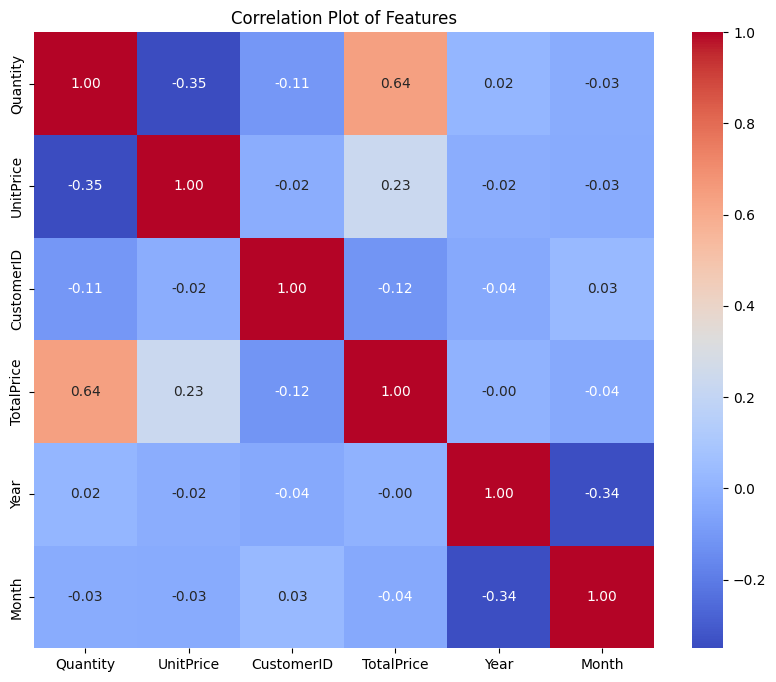

In [184]:
# Select your features wisely to avoid overfitting:
# Computing the correlation matrix:
correlation_matrix = df.corr(numeric_only=True)

# Creating a heatmap of the correlation matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Features')
plt.show()

##### What all feature selection methods have you used  and why?

Answer Here.
* I employed a correlation matrix as part of the feature selection process.
* This matrix provides valuable insights into the relationships between different features in the dataset.
* By examining the correlation coefficients, which measure the strength and direction of linear relationships between pairs of variables, I gained a clearer understanding of how each feature influences others.
* This visual representation aids in identifying highly correlated features, which can be indicative of redundancy or multicollinearity in the data. Through this analysis, I prioritized features that exhibit significant correlations with the target variable or demonstrate unique contributions to the predictive model, thereby improving the model's performance and interpretability.

##### Which all features you found important and why?

Answer Here.
* I identified UnitPrice, Quantity, and TotalPrice as important features for the analysis.
* These features exhibit significant linear correlations, indicating a clear relationship with each other and potentially with the target variable.
* UnitPrice represents the price of each unit of a product, Quantity represents the number of products purchased, and TotalPrice is the total monetary value of the transaction.
* These features are crucial for understanding customer purchasing behavior and determining the overall revenue generated.
* Additionally, their linear correlation suggests that changes in one feature may directly influence changes in the others, making them valuable predictors for various analytical tasks such as sales forecasting or customer segmentation.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [89]:
# Transform Your data

### 6. Data Scaling

In [90]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [91]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [92]:
# Split your data to train and test. Choose Splitting ratio wisely.


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [93]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [185]:
df.head(2)

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


### ML Model - 1

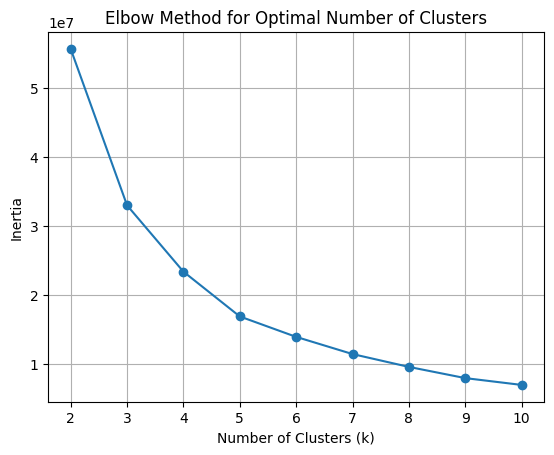

In [186]:
#Finding appropriate k for kmeans clusterring using elbow method:
#Importing necessary library for elbow method:
from sklearn.cluster import KMeans

# Defining the range of clusters to try:
k_values = range(2, 11)

X = df[['Quantity', 'TotalPrice']]

# Initializing a list to store inertias:
inertias = []

# Performing KMeans clustering for each value of k:
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Method:
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [193]:
# ML Model - 1 Implementation
#Importing necessary library for clusterring:
from sklearn.cluster import KMeans

# Selecting features for clustering
X = df[['Quantity', 'UnitPrice', 'TotalPrice']]

# Initializing KMeans with appropriate number of cluster as per elbow method graph:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init = 10, random_state=0)

# Fitting KMeans to the data:
kmeans.fit(X)

# Making a cluster column:
df.loc[:, ('Cluster')] = kmeans.labels_

# Displaying the clusters
print(df[['Quantity','UnitPrice', 'TotalPrice', 'Cluster']].head())

   Quantity  UnitPrice  TotalPrice  Cluster
0         6       2.55       15.30        0
1         6       3.39       20.34        0
2         8       2.75       22.00        0
3         6       3.39       20.34        0
4         6       3.39       20.34        0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

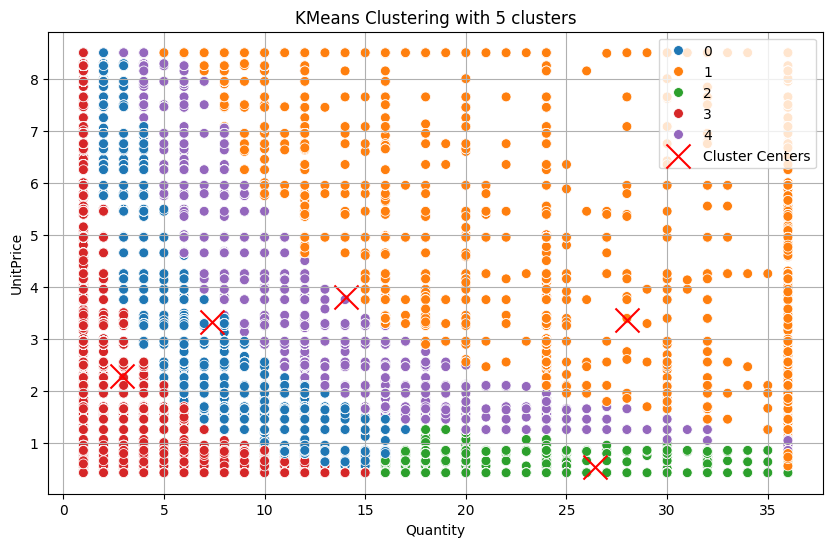

In [194]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features for clustering
X = df[['Quantity', 'UnitPrice', 'TotalPrice']]

# Initialize and fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='UnitPrice', hue='Cluster', palette='tab10', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=300, c='red', label='Cluster Centers')
plt.title('KMeans Clustering with 5 clusters')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend(loc='upper right')  # Specify the legend location
plt.grid(True)
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [191]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_kmeans = {'n_clusters': [2, 3, 4, 5]}

# Perform hyperparameter tuning using GridSearchCV
kmeans = KMeans(init='k-means++', n_init=10, random_state=0)  # Remove n_clusters=4

grid_search_kmeans = GridSearchCV(kmeans, param_grid_kmeans, cv=5)
grid_search_kmeans.fit(df[['Quantity', 'UnitPrice', 'TotalPrice']])

# Best hyperparameters
best_params_kmeans = grid_search_kmeans.best_params_
print("Best parameters for K-Means:", best_params_kmeans)


Best parameters for K-Means: {'n_clusters': 5}


In [212]:
# Making dataframe to visualize customer count in each cluster:
df_customer_count = df['Cluster'].value_counts()
df_customer_count

4    135036
0    118138
3     80948
1     43025
2     29642
Name: Cluster, dtype: int64

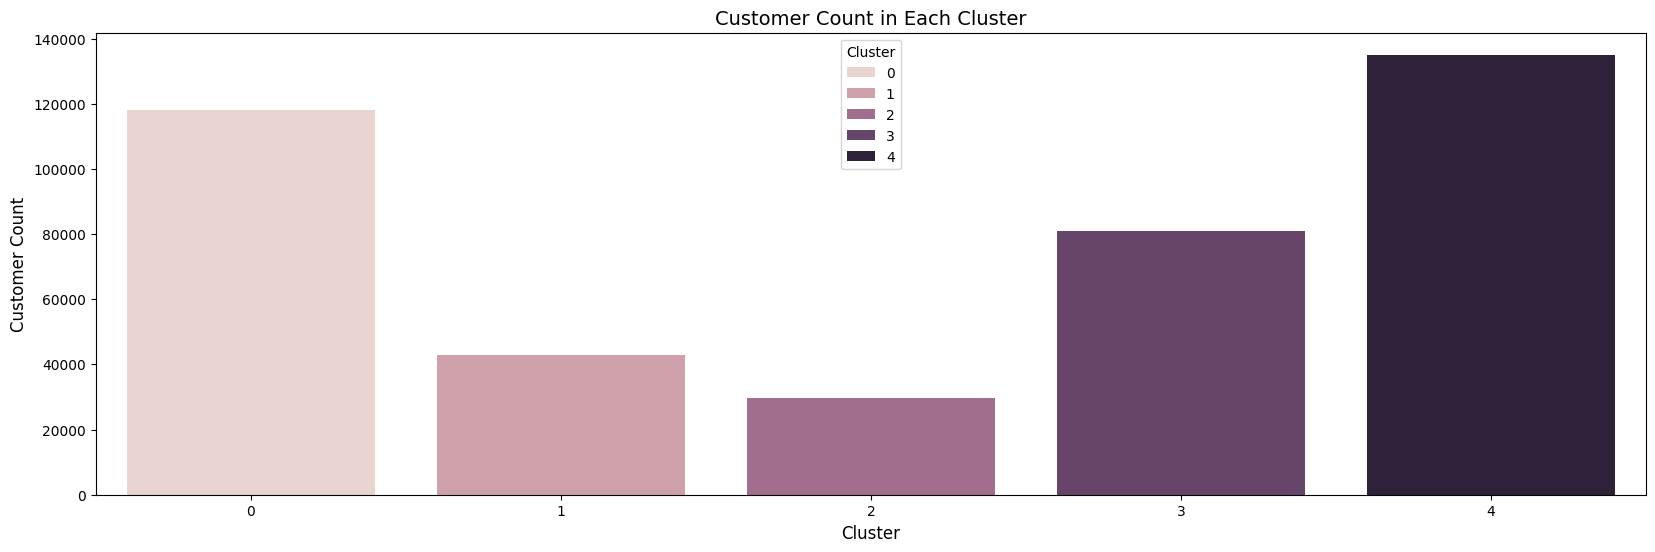

In [213]:
#Visualizing number of customers in each cluster:
plt.figure(figsize=(20, 6))
sns.countplot(data = df, x='Cluster', hue='Cluster')
plt.title('Customer Count in Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.
* The hyperparameter optimization technique used in the code is GridSearchCV.
* GridSearchCV systematically searches through a specified grid of hyperparameters, evaluating the performance of the model for each combination using cross-validation.
* This technique is chosen because it exhaustively explores the hyperparameter space, ensuring that the best combination of hyperparameters is selected based on the performance metric specified.
* In this case, the hyperparameters being tuned are the number of clusters (n_clusters) in the KMeans clustering algorithm, and GridSearchCV helps find the optimal number of clusters for the given dataset

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [216]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


# Select features for modeling
Y = df[['Quantity', 'UnitPrice', 'TotalPrice']]

# Define the pipeline with PCA and KMeans
pipeline = Pipeline([
    ('scaling', StandardScaler()),  # Feature scaling
    ('pca', PCA(n_components=2)),   # PCA for dimensionality reduction to 2 components
    ('kmeans', KMeans(n_clusters=5, n_init=10, random_state=0)) # Unsupervised ML model (e.g., KMeans clustering with 5 clusters)
])

# Fit the pipeline to the data
pipeline.fit(Y)

# Predict cluster labels
cluster_labels = pipeline.predict(Y)

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Print the first few rows of the DataFrame with cluster labels
df.head()



,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Cluster
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,3
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,3
2,536365,84406B,cream cupid heart coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,3
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,3
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,3


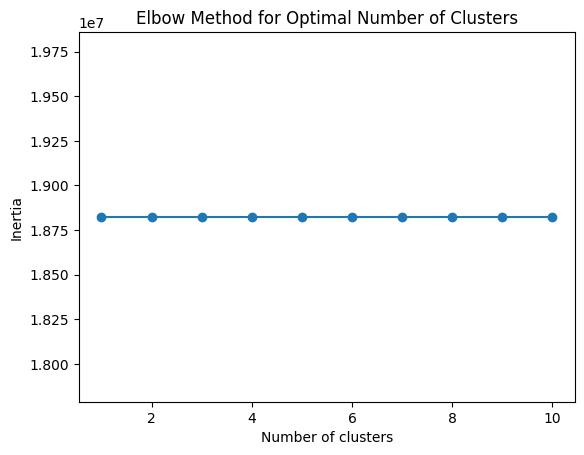

In [218]:
# Plot the elbow curve
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [219]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_pca = {'n_components': [1, 2, 3]}  # Update n_components values

# Perform hyperparameter tuning using GridSearchCV
pca = PCA()
grid_search_pca = GridSearchCV(pca, param_grid_pca, cv=5)
grid_search_pca.fit(df[['Quantity', 'UnitPrice', 'TotalPrice']])

# Best hyperparameters
best_params_pca = grid_search_pca.best_params_
print("Best parameters for PCA:", best_params_pca)


Best parameters for PCA: {'n_components': 2}


##### Which hyperparameter optimization technique have you used and why?

Answer Here.
* I have used Grid Search Cross-Validation (GridSearchCV) as hyperparameter optimization technique.

* GridSearchCV is chosen because it exhaustively searches over a specified parameter grid, evaluating each combination of hyperparameters using cross-validation.
* This technique is effective for finding the best set of hyperparameters for a model by systematically trying different combinations and selecting the one that yields the best performance according to a specified evaluation metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [99]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [100]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [102]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [103]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

In [222]:
# Making dataframe to visualize customer count in each cluster:
df_customer_count = df['Cluster'].value_counts()
df_customer_count

4    135036
0    118138
3     80948
1     43025
2     29642
Name: Cluster, dtype: int64

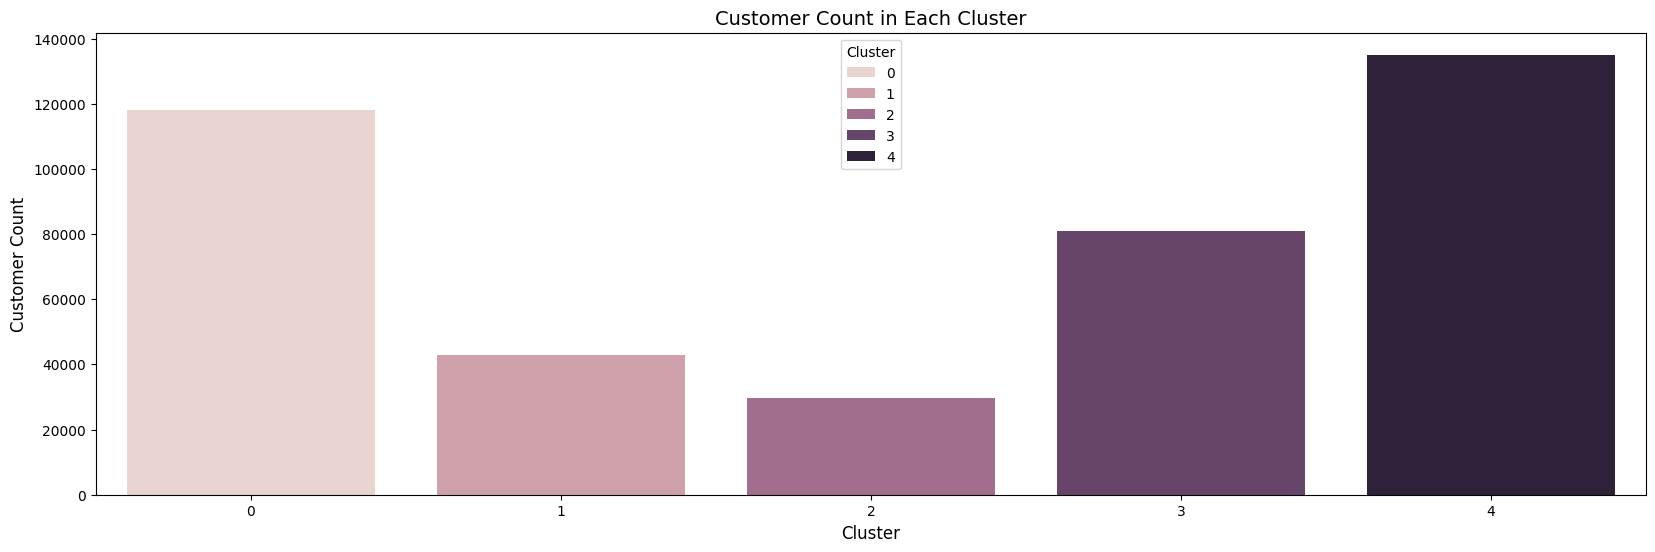

In [223]:
#Visualizing number of customers in each cluster:
plt.figure(figsize=(20, 6))
sns.countplot(data = df, x='Cluster', hue='Cluster')
plt.title('Customer Count in Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.show()

In [224]:
# Making dataset for sum of totalprice of each cluster:
cluster_total_revenue = df.groupby('Cluster').agg(TotalRevenue=('TotalPrice', 'sum')).reset_index()

cluster_total_revenue

,Cluster,TotalRevenue
0,0,1952830.89
1,1,1045033.76
2,2,1720565.91
3,3,1111140.77
4,4,522549.60


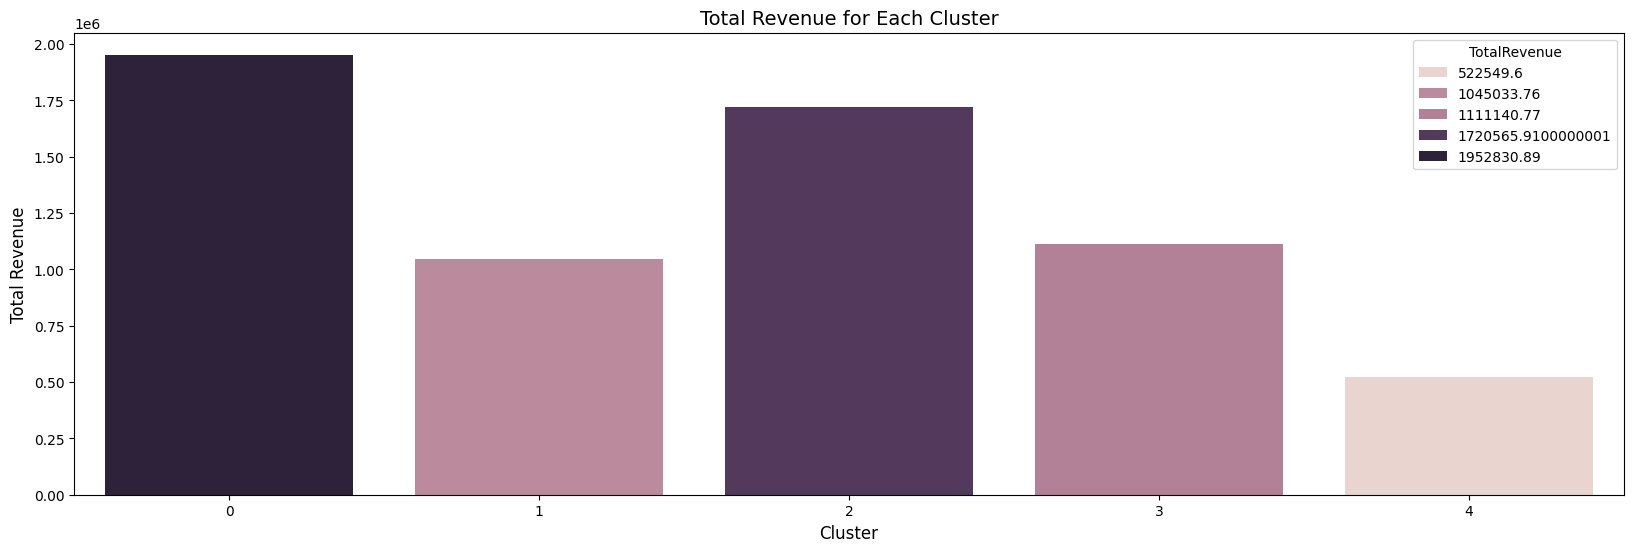

In [225]:
# Visualizing the barplot of totalprice:
plt.figure(figsize=(20, 6))
sns.barplot(data=cluster_total_revenue, x='Cluster', y='TotalRevenue', hue = 'TotalRevenue')
plt.title('Total Revenue for Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()

In [226]:
# Making dataset for Quantity of each cluster:
cluster_total_quantity = df.groupby('Cluster').agg(TotalQuantity = ('Quantity', 'sum')).reset_index()
cluster_total_quantity

,Cluster,TotalQuantity
0,0,1826166
1,1,125224
2,2,914878
3,3,295908
4,4,375173


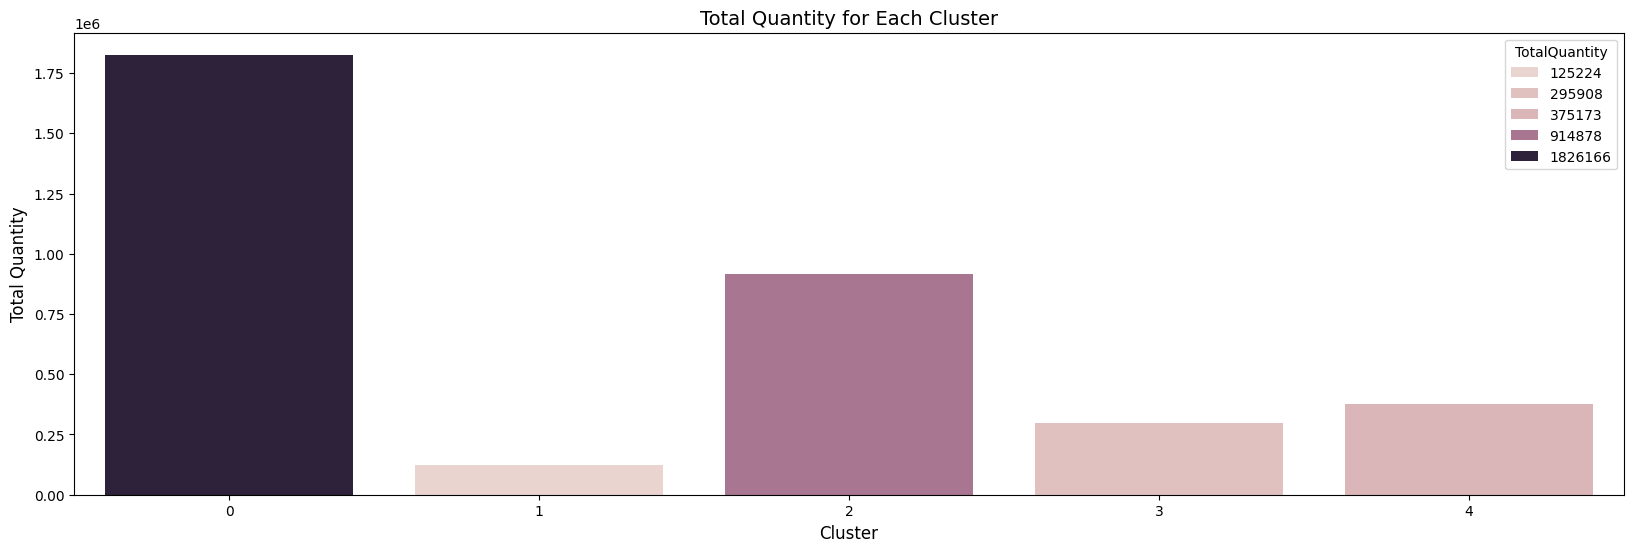

In [227]:
# Visualizing the barplot of totalquantity:
plt.figure(figsize=(20, 6))
sns.barplot(data=cluster_total_quantity , x = 'Cluster', y = 'TotalQuantity', hue = 'TotalQuantity')
plt.title('Total Quantity for Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.show()

In [228]:
# Making the DataFrame by 'Cluster' and calculate the minimum and maximum values for each numeric column:
cluster_stats = df.groupby('Cluster').agg({
    'TotalPrice': ['min', 'max'],
    'Quantity': ['min', 'max'],
    'UnitPrice': ['min', 'max']
}).reset_index()

# Creating a new DataFrame to store the 2D matrix:
matrix_data = {
    'Cluster': cluster_stats['Cluster'],
    'MinTotalPrice': cluster_stats[('TotalPrice', 'min')],
    'MaxTotalPrice': cluster_stats[('TotalPrice', 'max')],
    'MinQuantity': cluster_stats[('Quantity', 'min')],
    'MaxQuantity': cluster_stats[('Quantity', 'max')],
    'MinUnitPrice': cluster_stats[('UnitPrice', 'min')],
    'MaxUnitPrice': cluster_stats[('UnitPrice', 'max')]
}

cluster_matrix = pd.DataFrame(matrix_data)

cluster_matrix

,Cluster,MinTotalPrice,MaxTotalPrice,MinQuantity,MaxQuantity,MinUnitPrice,MaxUnitPrice
0,0,0.85,47.64,8,36,0.42,3.97
1,1,0.85,67.20,1,18,4.65,8.50
2,2,22.32,67.20,12,36,0.42,8.50
3,3,0.85,46.75,1,11,2.25,7.08
4,4,0.85,14.84,1,12,0.42,3.56


# **Conclusion**

Write the conclusion here.

*Observations:*
* Most of the sales were in 2011.
* Most of the sales occur between September to December.
* Stock code 22423 has the highest Total sales value.
* Stock code 84077 has the highest quantity sold.
* CustomerID 14646 has the most purchases.
* The suitable number of k for kmeans is 5 according to the elbow method graph.
* Cluster 4 has the most customers, i.e., 135036 .
* Cluster 0 has the highest total sales of 1952830.89 followed by cluster 2 with total sales of 1720565.9.
* Cluster  has 0 the most quantity sold, i.e., 1826166, followed by cluster 2 with 914878 quantity sold.


*Conclusion:*
* Customers in cluster 0 are the most important.
* Customers in cluster 0 are placing the most orders.
* Customers in cluster 0 account for the highest total sales of 1952830.89.
* Customers in cluster 2 are the second most valuable.
* Customers in cluster 2 account for the second-highest total sales of 1720565.9.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***